In [7]:
# 필요한 라이브러리 설치 및 임포트

# 데이터 처리
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 시각화 깨짐 방지 (한글 파일명 시 대비)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 출력 설정 
pd.set_option('display.max_columns', None)


In [8]:
#데이터 불러오기 및 기초 탐색 

# CSV 불러오기
movies = pd.read_csv("../data/movies.csv")
ratings = pd.read_csv("../data/ratings.csv")

# 기본 구조 확인
print("🎬 Movies\n", movies.head(), "\n")
print("⭐ Ratings\n", ratings.head())

🎬 Movies
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   

⭐ Ratings
    userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [9]:
# 기본 정보 확인
movies.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
# 결측치 확인
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [12]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [14]:
# 기본 통계값 확인
movies.describe()
ratings.describe()


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [15]:
# 분석 시작

# (1) 장르별 평점 분석

# 장르 문자열을 리스트로 변환
movies['genres'] = movies['genres'].str.split('|')

# explode()로 한 장르씩 행으로 펼치기
movies_exploded = movies.explode('genres')

print(movies_exploded.head())

   movieId             title     genres
0        1  Toy Story (1995)  Adventure
0        1  Toy Story (1995)  Animation
0        1  Toy Story (1995)   Children
0        1  Toy Story (1995)     Comedy
0        1  Toy Story (1995)    Fantasy


In [16]:
# 평점 데이터와 장르별 영화 데이터를 병합
merged_df = pd.merge(movies_exploded, ratings, on='movieId')

print(merged_df[['title', 'genres', 'rating']].head())


              title     genres  rating
0  Toy Story (1995)  Adventure     4.0
1  Toy Story (1995)  Adventure     4.0
2  Toy Story (1995)  Adventure     4.5
3  Toy Story (1995)  Adventure     2.5
4  Toy Story (1995)  Adventure     4.5


In [17]:
# 장르별 평균 평점 계산 (그룹화 후)
genre_avg = merged_df.groupby('genres')['rating'].mean().sort_values(ascending=False)

print("장르별 평균 평점")
print(genre_avg)


장르별 평균 평점
genres
Film-Noir             3.920115
War                   3.808294
Documentary           3.797785
Crime                 3.658294
Drama                 3.656184
Mystery               3.632460
Animation             3.629937
IMAX                  3.618335
Western               3.583938
Musical               3.563678
Adventure             3.508609
Romance               3.506511
Thriller              3.493706
Fantasy               3.491001
(no genres listed)    3.489362
Sci-Fi                3.455721
Action                3.447984
Children              3.412956
Comedy                3.384721
Horror                3.258195
Name: rating, dtype: float64


C:\Users\민소원\AppData\Local\Temp\ipykernel_33860\2999029694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg.values, y=genre_avg.index, palette="viridis")


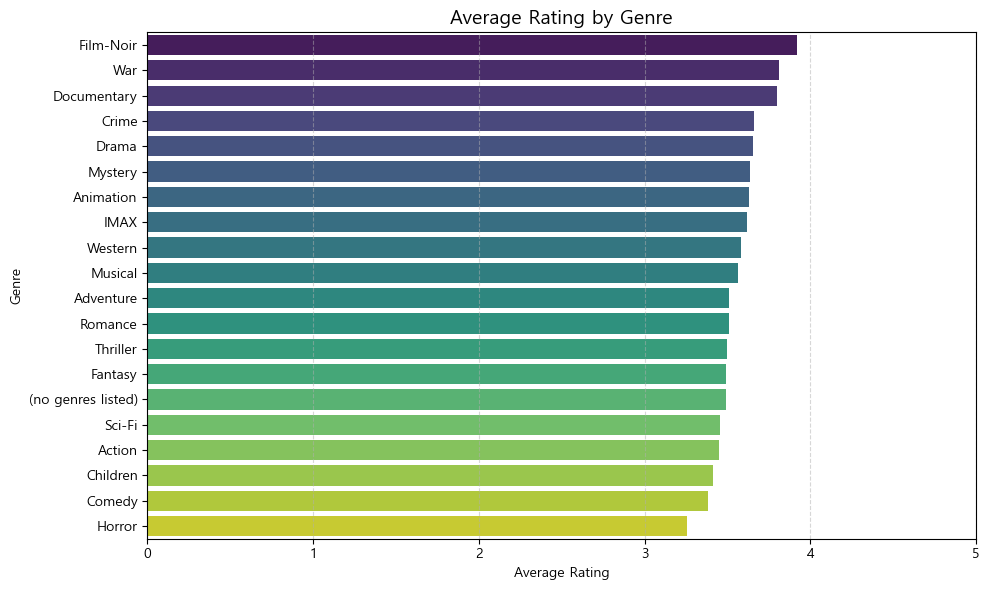

In [18]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_avg.values, y=genre_avg.index, palette="viridis")
plt.title("Average Rating by Genre", fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [19]:
# (2) 연도별 트렌드 분석 (Rating Trends by Year)
# 영화 제목 형식은 "Toy Story (1995)"처럼 연도가 괄호 안에 들어있음

import re

# 연도 추출 함수
def extract_year(title):
    match = re.search(r"\((\d{4})\)", title)
    return int(match.group(1)) if match else None

# 연도 열 생성
movies['year'] = movies['title'].apply(extract_year)

# 결과 확인
print(movies[['title', 'year']].head(10))


                                title    year
0                    Toy Story (1995)  1995.0
1                      Jumanji (1995)  1995.0
2             Grumpier Old Men (1995)  1995.0
3            Waiting to Exhale (1995)  1995.0
4  Father of the Bride Part II (1995)  1995.0
5                         Heat (1995)  1995.0
6                      Sabrina (1995)  1995.0
7                 Tom and Huck (1995)  1995.0
8                 Sudden Death (1995)  1995.0
9                    GoldenEye (1995)  1995.0


In [20]:
# 평점 데이터와 병합
# 평점과 연도 포함 영화 정보 병합
movies_with_year = movies[['movieId', 'title', 'year']]
merged_df = pd.merge(ratings, movies_with_year, on='movieId')

# 연도 결측치 제거
merged_df = merged_df.dropna(subset=['year'])

# 정수형 변환
merged_df['year'] = merged_df['year'].astype(int)

print(merged_df[['title', 'year', 'rating']].head())


                         title  year  rating
0             Toy Story (1995)  1995     4.0
1      Grumpier Old Men (1995)  1995     4.0
2                  Heat (1995)  1995     4.0
3  Seven (a.k.a. Se7en) (1995)  1995     5.0
4   Usual Suspects, The (1995)  1995     5.0


In [21]:
# 연도별 평균 평점 계산
yearly_avg = merged_df.groupby('year')['rating'].mean()

print(yearly_avg.tail(10))  # 최근 연도 예시



year
2009    3.568966
2010    3.569096
2011    3.460764
2012    3.512626
2013    3.457119
2014    3.512879
2015    3.410386
2016    3.387261
2017    3.578091
2018    3.483516
Name: rating, dtype: float64


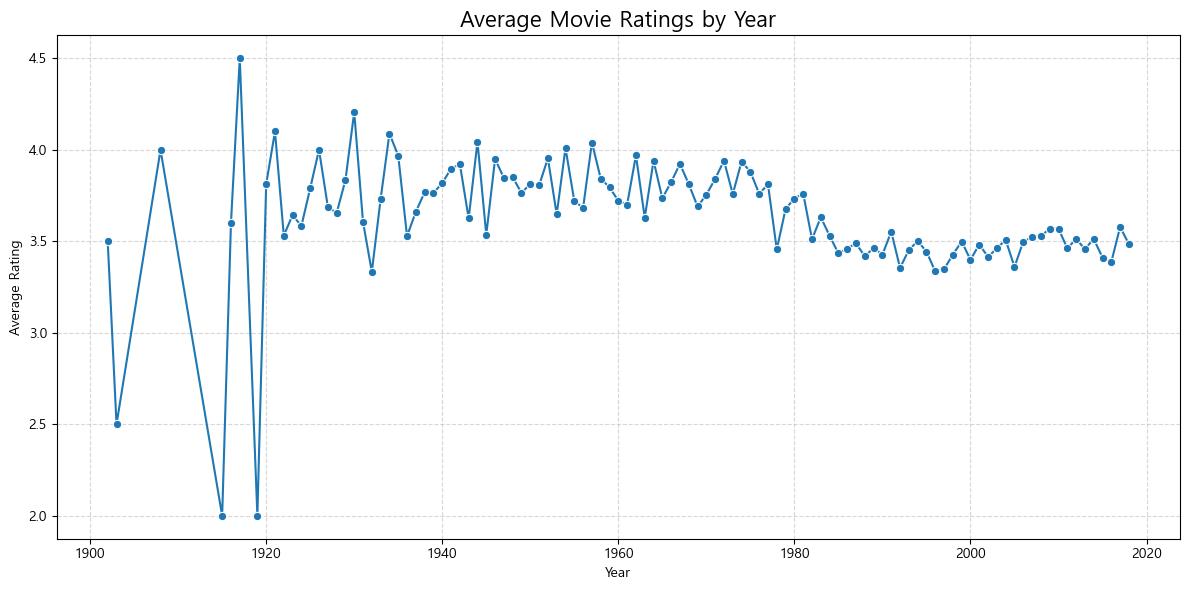

In [22]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker="o")
plt.title("Average Movie Ratings by Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import re

# 1. CSV 로딩
movies = pd.read_csv("../data/movies.csv")
ratings = pd.read_csv("../data/ratings.csv")

# 2. 연도 추출
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        year = int(match.group(1))
        # 1900~2025 사이만 유효하게 처리
        return year if 1900 <= year <= 2025 else None
    return None

movies['year'] = movies['title'].apply(extract_year)

# 3. 장르 분해
movies = movies[movies['genres'] != '(no genres listed)']  # 없는 장르 제외
movies['genres'] = movies['genres'].str.split('|')
movies_exploded = movies.explode('genres')

# 4. 평점 데이터 병합
merged = pd.merge(movies_exploded, ratings, on='movieId')
merged = merged.dropna(subset=['year'])
merged['year'] = merged['year'].astype(int)

# 5. 2000–2020 필터링
filtered = merged[(merged['year'] >= 2000) & (merged['year'] <= 2020)]

# 6. 그룹화
grouped = filtered.groupby(['year', 'genres'])['rating'].mean().reset_index()

# 7. 연도별 최고 장르 추출
top_genres_per_year = grouped.loc[grouped.groupby('year')['rating'].idxmax()].reset_index(drop=True)

print(top_genres_per_year)


    year       genres    rating
0   2000      Musical  3.868421
1   2001    Film-Noir  3.843137
2   2002          War  3.726744
3   2003  Documentary  3.946154
4   2004         IMAX  3.819672
5   2005    Film-Noir  3.865979
6   2006  Documentary  3.736486
7   2007      Western  4.103175
8   2008         IMAX  3.914583
9   2009      Western  4.250000
10  2010      Mystery  4.016000
11  2011  Documentary  3.796875
12  2012      Western  3.943662
13  2013  Documentary  4.050000
14  2014  Documentary  3.978261
15  2015  Documentary  3.869565
16  2016  Documentary  3.973684
17  2017  Documentary  4.250000
18  2018      Romance  4.500000
